In [1]:
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [2]:
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('acc') >= 0.96):   
            print("Reached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [3]:
import tensorflow as tf
import gc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications import VGG16, DenseNet169
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,TensorBoard,TerminateOnNaN, LearningRateScheduler
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from tensorflow.keras.layers import Lambda, Reshape, DepthwiseConv2D, ZeroPadding2D, Add, MaxPooling2D,Activation, Flatten, Conv2D, Dense, Input, Dropout, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import shutil
import cv2
import os
#from classification_models.tfkeras import Classifiers
from datetime import datetime
%load_ext tensorboard

In [4]:
EPOCHS =30
INIT_LR = 0.00001
BS =8
default_image_size = tuple((50, 50))
image_size = 0
width=50
height=50
depth=3
train_dir=r"D:\DP\Ashish sec\Augmented C.B\ham"
#valid_dir=r"C:\Users\Glau\Desktop\DP\Pediastrum_cnn\Test"
train_folder=listdir(train_dir)
#valid_folder=listdir(valid_dir)

In [5]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [6]:
callbacks = MyCustomCallback()

In [8]:
train_image_list, train_image_label=[],[]
for disease_folder in train_folder:
    print(f"processing {disease_folder} ...")
    disease_img_folder= listdir(f"{train_dir}/{disease_folder}")
    #print(disease_img_folder)
    for disease_img in disease_img_folder:
    #for disease_img in disease_img_folder[: : 2]:    
        image_directory = f"{train_dir}/{disease_folder}/{disease_img}"
        if image_directory.endswith(".jpeg") == True or image_directory.endswith(".jpg") == True or  image_directory.endswith(".png") == True:
            train_image_list.append(convert_image_to_array(image_directory))
            train_image_label.append(disease_folder)
print("[INFO] Image loading completed")

processing AC ...
processing CT ...
processing KAM ...
processing LYN ...
processing MIC ...
processing NOS ...
processing OS ...
processing PAM ...
processing PTE ...
processing SCY ...
[INFO] Image loading completed


In [9]:
label_binarizer = LabelBinarizer()
bin_train_image_labels = label_binarizer.fit_transform(train_image_label)
#bin_valid_image_labels = label_binarizer.fit_transform(valid_image_label)
pickle.dump(label_binarizer,open('Label_Instance_burn_labelHAM14.pk', 'wb'))
n_classes = len(label_binarizer.classes_)

In [10]:
np_train_image_list = np.array(train_image_list, dtype=np.float32) / 255.0

In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,classification_report 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer

In [28]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model

_input = Input((50,50,3)) 

conv1  = Conv2D(filters=8, kernel_size=(7,7), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv12 = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4, activation="relu")(flat)
dense2 = Dense(4, activation="relu")(dense1)
output = Dense(10, activation="softmax")(dense1)


model  = Model(inputs=_input, outputs=output)

In [29]:
print(model.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 50, 50, 8)         1184      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 50, 50, 8)         584       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 25, 25, 8)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 25, 25, 128)       9344      
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 25, 25, 128)       147584    
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 25, 25, 128)       1475

In [30]:
model.compile(optimizer=RMSprop(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
conf_matrix_list_of_arrays = []
#loss_per_fold = []
seed = 10   # for reproducibility you can change it. 
np.random.seed(seed)
roundlabel=[]
test=[]
idtest=[]
x_validate=[]
kfold = KFold(5, True, seed)
for train_idx, val_idx in kfold.split(np_train_image_list, y=bin_train_image_labels):
    #print('train: %s, val: %s' % (train_idx, val_idx))
    x_train, x_val = np_train_image_list[train_idx], np_train_image_list[val_idx]
    y_train, y_val= bin_train_image_labels[train_idx], bin_train_image_labels[val_idx]
    history=model.fit(x_train, y_train,
                  validation_data=(x_val, y_val),
                  batch_size=BS,
                  epochs=EPOCHS, verbose=1        
                  )
    ycalculated = model.predict(x_val)
    yhat_classes =np.argmax(ycalculated,axis=1)
    rounded_labels=np.argmax(y_val,axis=1)                           
    conf_matrix = confusion_matrix(rounded_labels,yhat_classes)
    conf_matrix_list_of_arrays .append(conf_matrix)
    roundlabel.append(rounded_labels)
    test.append(yhat_classes)
    idtest.append(val_idx)
    
print('Score per fold')
for i in range(0, len(conf_matrix_list_of_arrays)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1}  - Accuracy: {conf_matrix_list_of_arrays[i]}%') 

Train on 14200 samples, validate on 3550 samples
Epoch 1/30
14200/14200 [==============================] - 15s 1ms/step - loss: 2.2792 - accuracy: 0.1448 - val_loss: 2.2439 - val_accuracy: 0.1651
Epoch 2/30
14200/14200 [==============================] - 13s 933us/step - loss: 2.2188 - accuracy: 0.1605 - val_loss: 2.1889 - val_accuracy: 0.1755
Epoch 3/30
14200/14200 [==============================] - 13s 939us/step - loss: 2.1636 - accuracy: 0.1892 - val_loss: 2.1303 - val_accuracy: 0.2561
Epoch 4/30
14200/14200 [==============================] - 11s 786us/step - loss: 2.1024 - accuracy: 0.2163 - val_loss: 2.0782 - val_accuracy: 0.2515
Epoch 5/30
14200/14200 [==============================] - 11s 796us/step - loss: 2.0393 - accuracy: 0.2368 - val_loss: 1.9931 - val_accuracy: 0.2620
Epoch 6/30
14200/14200 [==============================] - 11s 790us/step - loss: 1.9769 - accuracy: 0.2618 - val_loss: 1.9418 - val_accuracy: 0.2868
Epoch 7/30
14200/14200 [==============================] - 1

14200/14200 [==============================] - 16s 1ms/step - loss: 0.7164 - accuracy: 0.7970 - val_loss: 0.7268 - val_accuracy: 0.8200
Epoch 26/30
14200/14200 [==============================] - 16s 1ms/step - loss: 0.7055 - accuracy: 0.7977 - val_loss: 0.7583 - val_accuracy: 0.7820
Epoch 27/30
14200/14200 [==============================] - 16s 1ms/step - loss: 0.6960 - accuracy: 0.8036 - val_loss: 0.6579 - val_accuracy: 0.8372
Epoch 28/30
14200/14200 [==============================] - 16s 1ms/step - loss: 0.6827 - accuracy: 0.8060 - val_loss: 0.6711 - val_accuracy: 0.8349
Epoch 29/30
14200/14200 [==============================] - 16s 1ms/step - loss: 0.6778 - accuracy: 0.8061 - val_loss: 0.7705 - val_accuracy: 0.7969
Epoch 30/30
14200/14200 [==============================] - 16s 1ms/step - loss: 0.6670 - accuracy: 0.8085 - val_loss: 0.8536 - val_accuracy: 0.7065
Train on 14200 samples, validate on 3550 samples
Epoch 1/30
14200/14200 [==============================] - 16s 1ms/step - lo

Epoch 20/30
14200/14200 [==============================] - 16s 1ms/step - loss: 0.2718 - accuracy: 0.9268 - val_loss: 0.2628 - val_accuracy: 0.9310
Epoch 21/30
14200/14200 [==============================] - 16s 1ms/step - loss: 0.2686 - accuracy: 0.9287 - val_loss: 0.2976 - val_accuracy: 0.9155
Epoch 22/30
14200/14200 [==============================] - 16s 1ms/step - loss: 0.2607 - accuracy: 0.9304 - val_loss: 0.2678 - val_accuracy: 0.9296
Epoch 23/30
14200/14200 [==============================] - 16s 1ms/step - loss: 0.2535 - accuracy: 0.9312 - val_loss: 0.2696 - val_accuracy: 0.9285
Epoch 24/30
14200/14200 [==============================] - 16s 1ms/step - loss: 0.2509 - accuracy: 0.9302 - val_loss: 0.3691 - val_accuracy: 0.8983
Epoch 25/30
14200/14200 [==============================] - 16s 1ms/step - loss: 0.2480 - accuracy: 0.9315 - val_loss: 0.2551 - val_accuracy: 0.9254
Epoch 26/30
14200/14200 [==============================] - 15s 1ms/step - loss: 0.2446 - accuracy: 0.9317 - val_

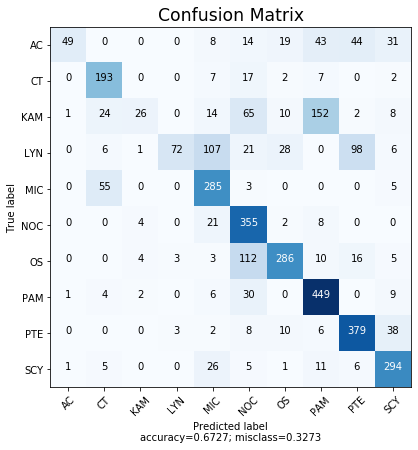

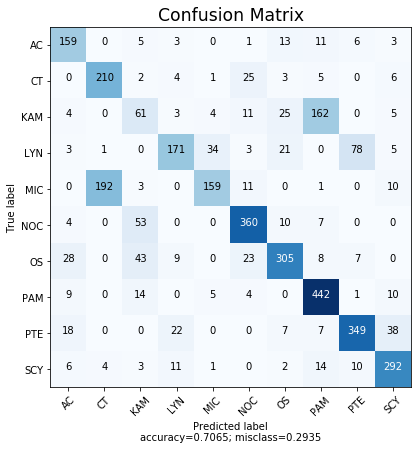

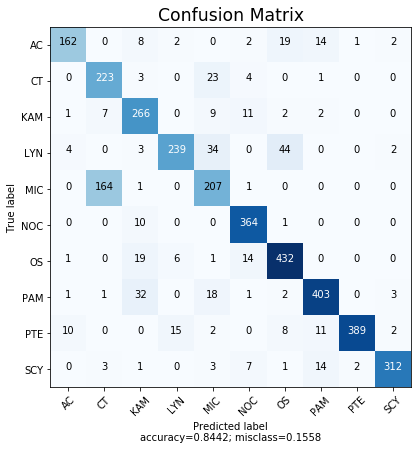

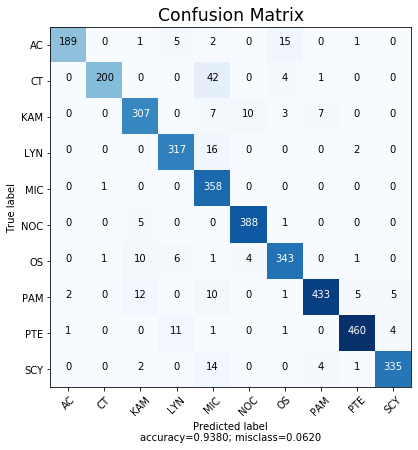

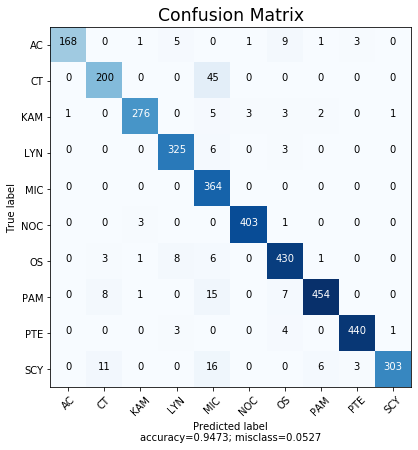

In [32]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 'xx-large')

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
for i in range(5):
    plot_confusion_matrix(conf_matrix_list_of_arrays[i], 
                      normalize = False,
                      target_names = ['AC', 'CT', 'KAM','LYN','MIC','NOC','OS','PAM','PTE','SCY'],
                      title        = "Confusion Matrix")

In [33]:
class_to_label_map={0:'AC',1: 'CT', 2:'KAM',3:'LYN',4:'MIC',5:'NOC',6:'OS',7:'PAM',8:'PTE',9:'SCY' }

C:\Users\Glau\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


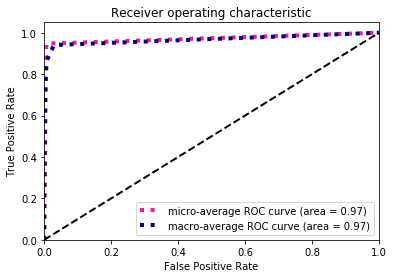

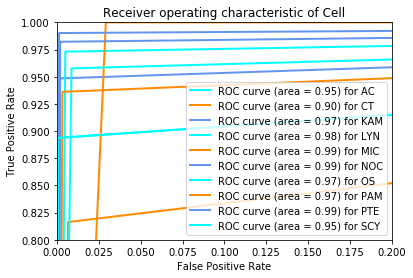

In [34]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

n_classes =10

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
lb = LabelBinarizer()
lb.fit(rounded_labels)
y_test= lb.transform(rounded_labels)
snn_pred = lb.transform(yhat_classes)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], snn_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), snn_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)

for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], class_to_label_map[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw,color='white')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Cell')
plt.legend(loc="lower right")
plt.show()

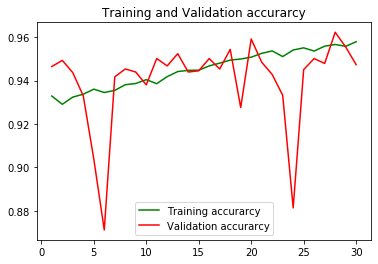

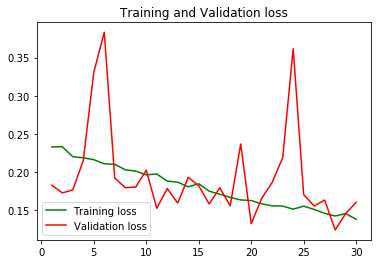

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'g', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()